In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
from growth.sweep.simulation import GrowthSimulation
import numpy as np

In [28]:
division = 1.
recombination = 0.3
start = 0
duration = 2
population = 11

culture = GrowthSimulation(division, recombination, start, duration, population)
culture.run()

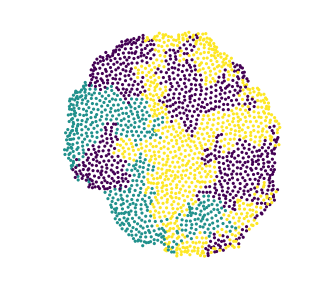

In [29]:
culture.plot(colorby='genotype', cmap=plt.cm.viridis, s=10)

# Simulation video

In [ ]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [ ]:
# play video
HTML(genotype_video)

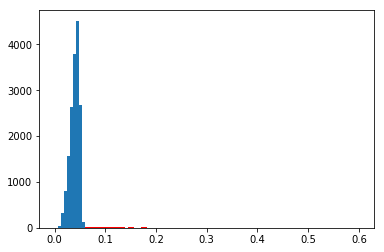

In [18]:
edges = culture.triangulation.edge_list
edge_lengths = culture.triangulation.evaluate_edge_lengths(edges, *culture.xy.T)

bins = np.linspace(0, 0.6, 100)
_ = plt.hist(edge_lengths, bins=bins)
outlier_mask = culture.triangulation.is_outlier(edge_lengths, 2)
_ = plt.hist(edge_lengths[outlier_mask], bins=bins, color='r')

In [70]:
from matplotlib.collections import LineCollection
import numpy as np
ind = np.argsort(lengths, axis=1)

In [15]:
culture.triangulation.edge_lengths

array([0.29953946, 0.56802293, 0.1455573 , ..., 0.06966834, 0.07506553,
       0.07506553])

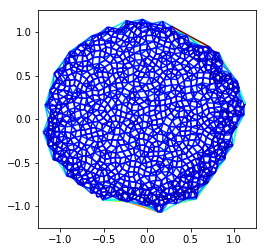

In [27]:
edges = culture.triangulation.edges
edge_lengths = culture.triangulation.evaluate_edge_lengths(edges, *culture.xy.T)


cmap = plt.cm.jet
norm = Normalize(edge_lengths.min(), edge_lengths.max())


fig, ax = plt.subplots()
pts = culture.xy[edges]

lines = LineCollection(pts, colors=cmap(norm(edge_lengths)))
ax.add_collection(lines)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect(1)